In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LogisticRegression
# Support vector machine linear classifier
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

In [58]:
# Read in full dataset
all_songs_df = pd.read_csv('../Resources/all_songs_final.csv')

# Filter billboard songs to those that charted for more than 1 week and reached top 25
all_songs_df = all_songs_df[(all_songs_df['billboard']==0) | ((all_songs_df['weeks-on-board']>1) & (all_songs_df['peak-rank']<=25))]

In [59]:
df1960s = all_songs_df[all_songs_df['decade']=='1960s']

In [60]:
data = df1960s[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

target = df1960s["billboard"]
target_names = ["hit", "not_a_hit"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [74]:
oversample = SMOTE(random_state=0, sampling_strategy=1)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [75]:
steps = [
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight="balanced"))
]

pipe = Pipeline(steps)

params = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'lr__solver': ['sag', 'lbfgs']}

In [76]:
cv = GridSearchCV(pipe, params)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(class_weight='balanced'))])

In [77]:
# Evaluate performance
pipe.score(X_test, y_test)

0.6945399007254678

In [78]:
y_predsc = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_predsc)
print(cm)

[[1418  701]
 [  99  401]]


In [79]:
f1_score(y_test, y_predsc)

0.5006242197253433

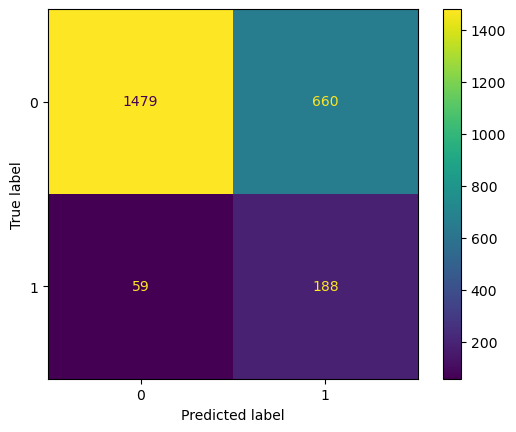

In [137]:
ConfusionMatrixDisplay(cm).plot()

In [113]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train_res, y_train_res)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: ne

LogisticRegression(class_weight='balanced', max_iter=200, random_state=1234,
                   solver='newton-cg')


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/glena

In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[1418  701]
 [ 101  399]] : is the confusion matrix 

0.6937762504772814 : is the accuracy score
0.36272727272727273 : is the precision score
0.798 : is the recall score
0.49875 : is the f1 score


In [136]:
test_song = [0.586,
 0.616,
 5,
 -7.964,
 1,
 0.0324,
 0.182,
 0,
 0.0927,
 0.719,
 148.088,
 242096]

cv.predict([test_song])

/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 12 features, but StandardScaler is expecting 10 features as input.

In [98]:
corr_matrix = data.corr()
print(corr_matrix)

                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.432618  0.433950     0.168284     -0.354337   
energy                0.432618  1.000000  0.780798     0.095330     -0.665780   
loudness              0.433950  0.780798  1.000000    -0.034467     -0.523742   
speechiness           0.168284  0.095330 -0.034467     1.000000      0.007550   
acousticness         -0.354337 -0.665780 -0.523742     0.007550      1.000000   
instrumentalness     -0.367900 -0.348904 -0.477756    -0.104486      0.331891   
liveness              0.021469  0.196229  0.104608     0.260328     -0.045738   
valence               0.697970  0.673203  0.570694     0.056620     -0.489233   
tempo                 0.163563  0.275154  0.229522     0.050502     -0.218235   
duration_ms          -0.285594 -0.188319 -0.187741    -0.036695      0.132158   

                  instrumentalness  liveness   valence     tempo  duration_ms  
danceability             -0.

In [99]:
import seaborn as sn
import matplotlib.pyplot as plt

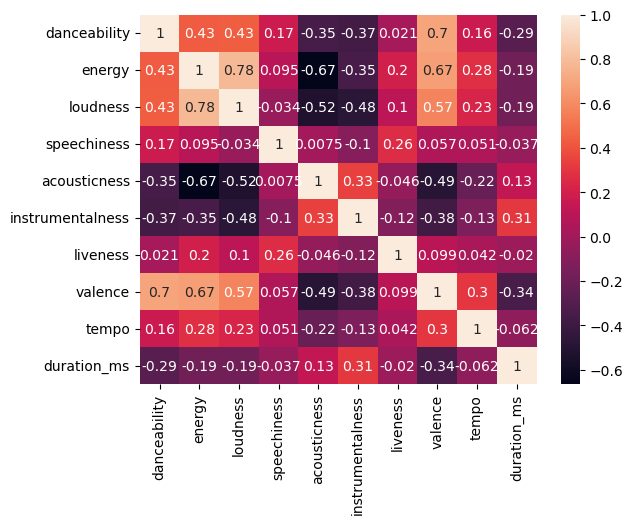

In [100]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='year'>

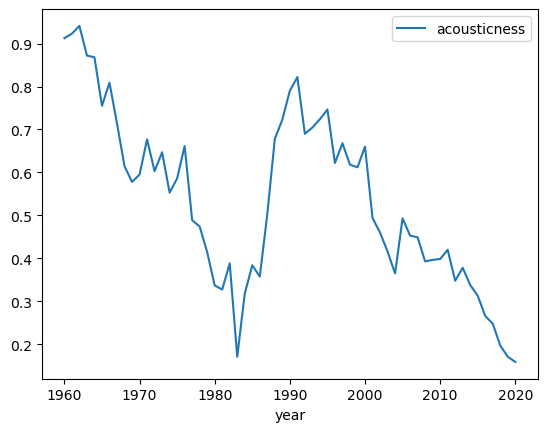

In [17]:
danceability_df = all_songs_df[all_songs_df["billboard"]==0].groupby(["year"], as_index=False).median()

danceability_df.plot("year", "acousticness")

In [6]:
df1960s.groupby("year", as_index=False).median()

,year,peak-rank,weeks-on-board,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard
0,1960,0.0,0.0,0.3780,0.2360,5.0,-15.4840,1.0,0.04060,0.8950,0.011600,0.1520,0.3320,107.5340,180560.0,4.0,0.0
1,1961,0.0,0.0,0.4080,0.2570,5.0,-15.7560,1.0,0.04110,0.9060,0.375500,0.1420,0.3505,104.5770,183960.0,4.0,0.0
2,1962,0.0,0.0,0.4025,0.2365,5.0,-15.2430,1.0,0.03980,0.9265,0.055100,0.1420,0.3550,104.0855,177326.5,4.0,0.0
3,1963,0.0,0.0,0.4635,0.2890,5.0,-13.9540,1.0,0.04030,0.8490,0.000207,0.1480,0.4695,107.4260,174620.5,4.0,0.0
4,1964,0.0,0.0,0.4110,0.2975,5.0,-14.3055,1.0,0.04190,0.8490,0.000340,0.1555,0.4120,106.8575,184133.0,4.0,0.0
5,1965,0.0,0.0,0.4710,0.3640,5.0,-12.1100,1.0,0.03840,0.7370,0.000101,0.1440,0.5220,113.4980,170893.0,4.0,0.0
6,1966,0.0,0.0,0.4665,0.3220,5.0,-13.6935,1.0,0.03975,0.7655,0.000446,0.1330,0.4955,109.7910,170533.0,4.0,0.0
7,1967,0.0,0.0,0.4910,0.4060,5.0,-11.8130,1.0,0.03800,0.6740,0.000021,0.1490,0.5450,115.0680,175360.0,4.0,0.0
8,1968,0.0,0.0,0.4900,0.4340,5.0,-11.1890,1.0,0.03960,0.5960,0.000196,0.1540,0.5330,113.9720,183800.0,4.0,0.0
9,1969,0.0,0.0,0.4680,0.4370,5.0,-12.1390,1.0,0.04125,0.5590,0.002640,0.1440,0.5500,112.2195,195640.0,4.0,0.0


In [221]:
df

,song,artist,year,peak-rank,weeks-on-board,track_id,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard,decade
838746,Jimmy Neutron,iCizzle,0,0,0,035h5flqzwF6I5CTfsdHPA,0.795,0.562,2.0,-11.327,...,0.0519,0.01560,0.439,0.0860,0.389,109.985,183000.0,4.0,0,NaN
838747,I Luv You,iCizzle,0,0,0,49x05fLGDKCsCUA7CG0VpY,0.762,0.328,2.0,-14.319,...,0.0950,0.88700,0.909,0.1060,0.728,92.962,145161.0,4.0,0,NaN
838748,My Heart,iCizzle,0,0,0,4mNLlSoZOqoPauBAF3bIpx,0.671,0.545,6.0,-15.363,...,0.0662,0.00956,0.902,0.0455,0.893,97.865,176561.0,4.0,0,NaN
838749,I Am (Invincible),iCizzle,0,0,0,7w5iwI0wnIiopbCFNe1Txo,0.759,0.582,10.0,-12.985,...,0.1280,0.00544,0.895,0.0538,0.537,89.989,192000.0,4.0,0,NaN
838750,Flower Power,iCizzle,0,0,0,2Tfy2R2uiWVwxHQUT6oGNp,0.657,0.550,5.0,-13.842,...,0.2810,0.01800,0.245,0.2410,0.964,179.904,138666.0,4.0,0,NaN
838751,Heard It Low,iCizzle,0,0,0,05cTbSPQyha6z7opYwH67O,0.728,0.499,1.0,-12.557,...,0.0673,0.00785,0.275,0.0865,0.662,90.010,138667.0,4.0,0,NaN
838752,Hangin On,iCizzle,0,0,0,1fYK5xB8csOXVEqApkzzm0,0.822,0.720,10.0,-14.481,...,0.0758,0.11500,0.881,0.1210,0.766,119.998,142620.0,4.0,0,NaN
838753,God Loves You,iCizzle,0,0,0,4G51c7cWzB6CLaRq9sYj2w,0.845,0.673,7.0,-12.835,...,0.0662,0.00274,0.548,0.0393,0.472,120.090,161000.0,4.0,0,NaN
838754,You In My Life,iCizzle,0,0,0,45fcUAjXlzDxTwSzoUaO6l,0.957,0.104,7.0,-22.989,...,0.0623,0.13300,0.857,0.0968,0.258,112.987,214867.0,4.0,0,NaN
838755,I Wonder,iCizzle,0,0,0,35TcKSN5hsGcZLrFPkUvIv,0.659,0.453,5.0,-17.464,...,0.0581,0.00196,0.854,0.3710,0.877,146.020,180822.0,4.0,0,NaN
